Resource used:
https://github.com/aniruddha27/Information-Extraction-using-Python/blob/main/Information%20Extraction%20using%20Python.ipynb

# What is Information Extraction?

In [1]:
# import spacy
import spacy

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

text = "This is a sample sentence."

# create spacy 
doc = nlp(text)

for token in doc:
    print(token.text,'->',token.pos_)

This -> PRON
is -> AUX
a -> DET
sample -> NOUN
sentence -> NOUN
. -> PUNCT


In [2]:
for token in doc:
    # check token pos
    if token.pos_=='NOUN':
        # print token
        print(token.text)

sample
sentence


In [3]:
text = "The children love cream biscuits"

# create spacy 
doc = nlp(text)

for token in doc:
    print(token.text,'->',token.pos_)

The -> DET
children -> NOUN
love -> VERB
cream -> NOUN
biscuits -> NOUN


In [4]:
from spacy import displacy 
displacy.render(doc, style='dep',jupyter=True)

In [5]:
for token in doc:
    # extract subject
    if (token.dep_=='nsubj'):
        print(token.text)
    # extract object
    elif (token.dep_=='dobj'):
        print(token.text)

children
biscuits


# Analysis for WhatsApp Chat Data

In [6]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import glob
import regex 
import re, nltk
import emoji
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
wordnet_lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS

In [7]:
# Function to detect the date at the start of the line to make each row unique.
def DateTime(s):
    regex_format = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(regex_format, s)
    if result:
        return True
    return False

# Function to extract the group chat participant names
def Participants(a):
  a=a.split(":")
  if len(a)==2:
    return True
  else:
    return False

# Function to organize the data properly to be represented as a pandas dataframe
def GetDataPoints(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if Participants(message): 
        splitMessage = message.split(': ') 
        participants = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        participants = None
    return date, time, participants, message

 # Function to extract the emojis and add them to a new column
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

In [8]:
# Folder path
parsedData=[]
data = [] 
text_data = '/Users/aiyinchen/Documents/NLU Project/WhatsApp Chat with Nic - Baddy Coaching.txt' # replace with the file name of your text data
with open(text_data, encoding="utf-8") as fp: #fp stands for file pointer and helps in reading in the data
    fp.readline()
    messageBuffer = [] 
    date, time, participants = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if DateTime(line): 
            if len(messageBuffer)> 0: 
                parsedData.append([date, time, participants, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, participants, message = GetDataPoints(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [9]:
clean_data = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Participants', 'Message']) # Reading in the data in a dataframe form
clean_data["Date"] = pd.to_datetime(clean_data["Date"])# making sure the date column is in a datetime format.  
clean_data["emoji"] = clean_data["Message"].apply(split_count) # Applying the emoji function to extract the emojis from the messages.

clean_data.head(20) # Having a look at the first 10 entries

,Date,Time,Participants,Message,emoji
0,2023-09-01,15:44,Aiyin 🔥,"Hi Nic, this is Aiyin here.. We were in touch ...",[]
1,2023-09-01,15:45,Aiyin 🔥,"I just checked, i didnt manage to book 9-10pm ...",[]
2,2023-09-01,15:52,Nic Baddy Coaching,"Hi Aiyin, 6-7pm is not a problem",[]
3,2023-09-01,15:53,Nic Baddy Coaching,My time is usually very flexible as long I don...,[]
4,2023-09-01,16:22,Aiyin 🔥,Thats perfect! I'll bring shuttles for the day...,[]
5,2023-09-01,16:23,Nic Baddy Coaching,Thanks. Just want to improve on general play,[]
6,2023-09-01,16:24,Nic Baddy Coaching,Probably have a lot of bad habits. Struggle to...,[]
7,2023-09-01,16:26,Aiyin 🔥,Ahh okayy lets see what we can work on for Wed...,[]
8,2023-09-01,16:27,Nic Baddy Coaching,Me too! Thanks,[]
9,2023-09-02,23:45,Nic Baddy Coaching,"Hi Aiyin, is this at the Moberly Sports Centre...",[]


In [10]:
clean_data.loc[0,'Message']

'Hi Nic, this is Aiyin here.. We were in touch on Superprof'

Speech Text Pre-Processing

In [11]:
# might not have to run this
# function to preprocess speech
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    
    # hyphens might mean 'to'
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
    return text

# preprocessing speeches
clean_data['Message_cleaned'] = clean_data['Message'].apply(clean)


In [12]:
clean_data.head()

,Date,Time,Participants,Message,emoji,Message_cleaned
0,2023-09-01,15:44,Aiyin 🔥,"Hi Nic, this is Aiyin here.. We were in touch ...",[],"Hi Nic, this is Aiyin here.. We were in touch ..."
1,2023-09-01,15:45,Aiyin 🔥,"I just checked, i didnt manage to book 9-10pm ...",[],"I just checked, i didnt manage to book 9 10pm ..."
2,2023-09-01,15:52,Nic Baddy Coaching,"Hi Aiyin, 6-7pm is not a problem",[],"Hi Aiyin, 6 7pm is not a problem"
3,2023-09-01,15:53,Nic Baddy Coaching,My time is usually very flexible as long I don...,[],My time is usually very flexible as long I don...
4,2023-09-01,16:22,Aiyin 🔥,Thats perfect! I'll bring shuttles for the day...,[],Thats perfect! I'll bring shuttles for the day...


# Information Extraction using Spacy

In [13]:
!pip install visualise-spacy-tree

DEPRECATION: ptype 0.2.17 has a non-standard dependency specifier scikit-learn>=0.24.2scipy>=1.5.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of ptype or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [14]:
import spacy
from spacy.matcher import Matcher 

from spacy import displacy 
import visualise_spacy_tree
from IPython.display import Image, display

# load english language model
#nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
nlp = spacy.load('en_core_web_sm')

In [15]:
text = clean_data.loc[0,'Message']
print(text)

Hi Nic, this is Aiyin here.. We were in touch on Superprof


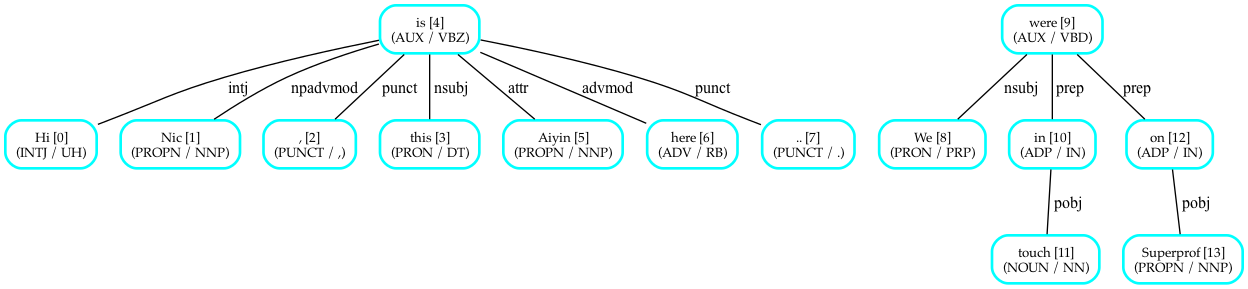

In [16]:
# Printing dependency tree
text = clean_data.loc[0,'Message']
doc = nlp(text)
png = visualise_spacy_tree.create_png(doc)
display(Image(png))

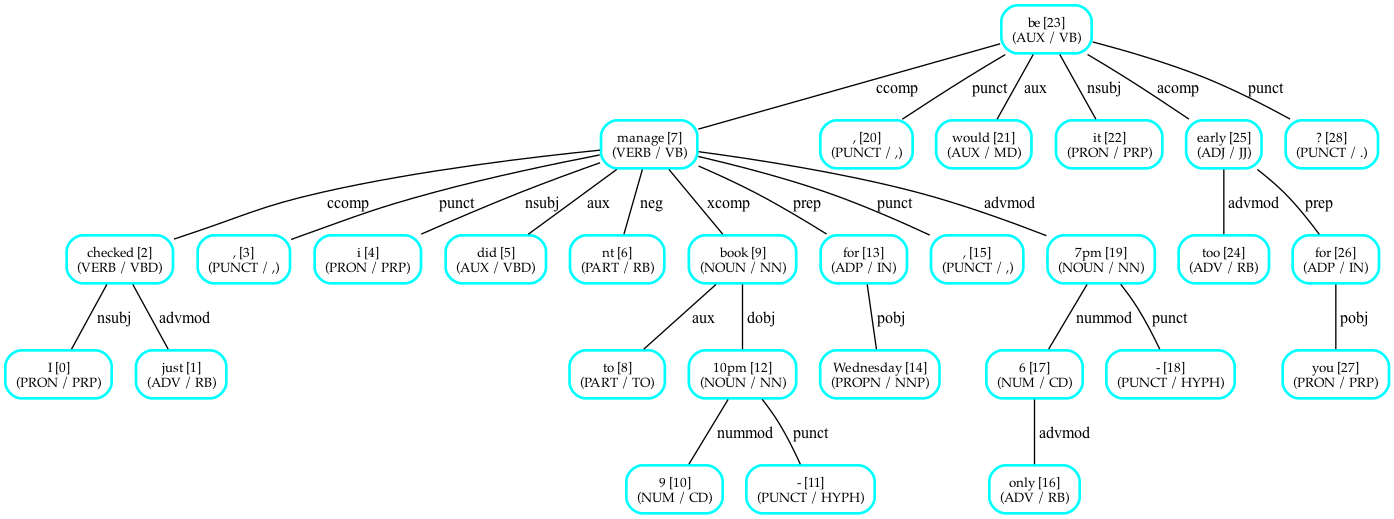

In [17]:
# Printing dependency tree
text = clean_data.loc[1,'Message']
doc = nlp(text)
png = visualise_spacy_tree.create_png(doc)
display(Image(png))

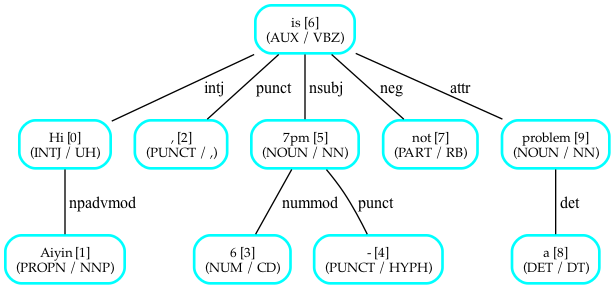

In [18]:
# Printing dependency tree
text = clean_data.loc[2,'Message']
doc = nlp(text)
png = visualise_spacy_tree.create_png(doc)
display(Image(png))

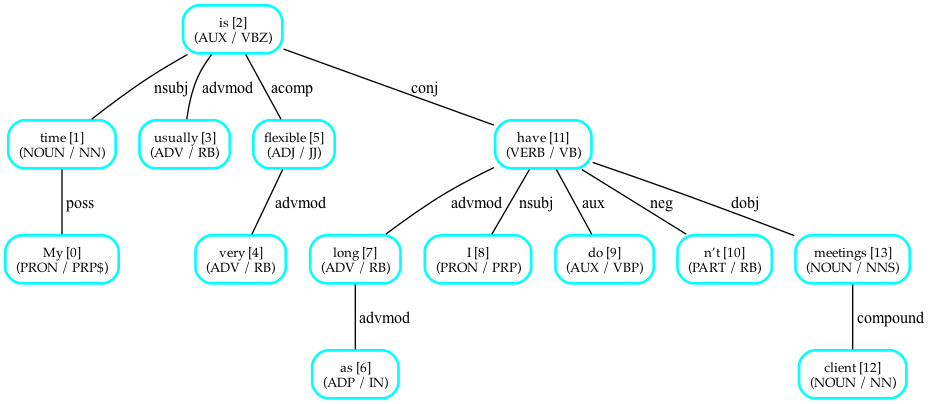

In [19]:
# Printing dependency tree
text = clean_data.loc[3,'Message']
doc = nlp(text)
png = visualise_spacy_tree.create_png(doc)
display(Image(png))

In [20]:
#Morphology

# rule to extract initiative name
def sent_subtree(text):
    
    # pattern match for badminton training scheduling
    patterns = [
    r'(?i)\b' + 'book' + r'\b',
    r'(?i)\b' + 'availability' + r'\b',
    r'(?i)\b' + 'time' + r'\b',
    r'(?i)\b' + 'badminton' + r'\b',
    r'(?i)\b' + 'session' + r'\b',
    r'(?i)\b' + 'day' + r'\b',
    r'(?i)\b' + 'train' + r'\b',
    ]
    
#    patterns = [r'\b(?i)'+'book'+r'\b',
#           r'\b(?i)'+'court'+r'\b',
#           r'\b(?i)'+'availability'+r'\b',
#           r'\b(?i)'+'time'+r'\b',
#           r'\b(?i)'+'badminton'+r'\b',
#           r'\b(?i)'+'session'+r'\b',
#           r'\b(?i)'+'day'+r'\b',
#           r'\b(?i)'+'train'+r'\b']
    
    schemes = []
    doc = nlp(text)
    flag = 0
    # if no initiative present in sentence
    for pat in patterns:
        
        if re.search(pat, text) != None:
            flag = 1
            #print("Keyword present in sentence")
            break
    
    if flag == 0:
        #print("Keyword absent in sentence")
        return schemes

    # iterating over sentence tokens
    for token in doc:

        for pat in patterns:
            matches = re.findall(pat, text)
            #print(f"Pattern: {pat}, Matches: {matches}")        
            
            # if we get a pattern match
            if re.search(pat, token.text) != None:
                print("Pattern match")
                word = ''
                # iterating over token subtree
                for node in token.subtree:
                    # only extract the proper nouns
                    #if (node.pos_ == 'PROPN'):
                        word += node.text+' '
                
                print(word)
                if len(word)!=0:
                    schemes.append(word)
    print(schemes)
    return schemes      

# derive initiatives
clean_data['Scheme'] = clean_data['Message'].apply(sent_subtree)

Pattern match
to book 9 - 10pm 
['to book 9 - 10pm ']
Pattern match
My time 
['My time ']
Pattern match
the day 
['the day ']
Pattern match
a long time 
['a long time ']
Pattern match
badminton 
['badminton ']
Pattern match
the session 
['the session ']


In [21]:
count = 0
for i in range(len(clean_data)):
    if len(clean_data.loc[i,'Scheme'])!=0:
        count+=1
print(count)

6


# Extraction of 'date','time','location' from WhatsApp Chats

Obtain Sports Centre names using NER with SPACY

In [23]:
# Named Entity Recognition (NER) with SPACY
sport_centres_entities = []
sport_centres_entIndex = []

# Assuming 'clean_data' is your DataFrame
for index, row in clean_data.iterrows():
    text = row['Message']
    doc = nlp(text)
    # Extract ORG and GPE entities and store them in the array
    for ent in doc.ents:
        if ent.label_ in ['ORG', 'GPE']:
            sport_centres_entities.append(ent.text)
            sport_centres_entIndex.append(index)

# Use zip() to combine the arrays element-wise into pairs
sport_centres = list(zip(sport_centres_entIndex, sport_centres_entities))
print(sport_centres)

[(9, 'the Moberly Sports Centre'), (21, 'Kensington Leisure Centre'), (21, 'Moberly'), (31, 'Finsbury Leisure Centre'), (33, 'Finsbury Leisure Centre')]


In [25]:
from fuzzywuzzy import fuzz
distinct_entities = []
# Create a dictionary to store unique entries
unique_entities = {}

# Loop through the list and compare each pair of strings
for i in range(len(sport_centres_entities)):
    entity1 = sport_centres_entities[i]
    
    # Check if the entity has already been added as a similar string with fuzz ratio 100
    if entity1 not in unique_entities:
        for j in range(i + 1, len(sport_centres_entities)):

            entity2 = sport_centres_entities[j]

            # Calculate the fuzz ratio between the two strings
            fuzz_ratio = fuzz.partial_ratio(entity1.lower(), entity2.lower())

            #print(entity1, entity2, fuzz_ratio)

            # If the fuzz ratio is 100 (perfect match), keep only one of the entries
            if fuzz_ratio == 100:
                # Keep the shorter string as the representative
                if len(entity1) <= len(entity2):
                    unique_entities[entity1] = None
                else:
                    unique_entities[entity2] = None

# Add any remaining unique entries to the dictionary
for entity in sport_centres_entities:
    if entity not in unique_entities:
        unique_entities[entity] = None

# Convert the dictionary keys back to a list
distinct_entities = list(unique_entities.keys())

# Print the distinct values
for entity in distinct_entities:
    print(entity)

Moberly
Finsbury Leisure Centre
the Moberly Sports Centre
Kensington Leisure Centre


In [100]:
# Initialize an empty list to store data dictionaries
date_data_list = []


# Loop through the sport_centres pairs
for pair in sport_centres:
    sentence_index, location = pair
    #print(f"Element 1: {sentence_index}, Element 2: {location}")

    # Define the center index and range
    center_index = sentence_index  # Centre index is the current sentence index
    range_start = max(0, center_index - 4)  # Start at 0 or the calculated value (whichever is greater)
    range_end = min(len(clean_data['Message']) - 1, center_index + 4)  # End at the last index or the calculated value (whichever is smaller)

    
    # Check if we are within the context window (previous 3-4 or next 3-4 sentences)
    for index in range(range_start, range_end + 1):
        # Extract DATE entities and store them in a data dictionary
        test_sentence = clean_data['Message'][index]
        
        # Obtain date of message sent in test_sentence
        message_date = clean_data['Date'][index]
        doc = nlp(test_sentence)

        for ent in doc.ents:
            if ent.label_ == 'DATE':
                date_data = {
                    'entity': ent.text,
                    'sentence_index': index,
                    'message_date': message_date,
                    'location': location,
                    'sentence': test_sentence
                }
                date_data_list.append(date_data)

print(date_data_list)

[{'entity': 'tomorrow', 'sentence_index': 11, 'message_date': Timestamp('2023-09-06 00:00:00'), 'location': 'the Moberly Sports Centre', 'sentence': 'Hi Nic, you able to come slightly earlier at 5.30-6.30pm tomorrow?'}, {'entity': 'next week', 'sentence_index': 21, 'message_date': Timestamp('2023-09-07 00:00:00'), 'location': 'Kensington Leisure Centre', 'sentence': "For next week, I'll be at Kensington Leisure Centre on Tuesday, courts at Moberly seem booked out on Wed so would have to check other locations if we wanna do Wed"}, {'entity': 'Tuesday', 'sentence_index': 21, 'message_date': Timestamp('2023-09-07 00:00:00'), 'location': 'Kensington Leisure Centre', 'sentence': "For next week, I'll be at Kensington Leisure Centre on Tuesday, courts at Moberly seem booked out on Wed so would have to check other locations if we wanna do Wed"}, {'entity': 'yesterday', 'sentence_index': 22, 'message_date': Timestamp('2023-09-07 00:00:00'), 'location': 'Kensington Leisure Centre', 'sentence': "

In [101]:
import spacy
import re

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Define regular expression patterns to match time range values
pattern1 = r'(\d+(\.\d+)?)-(\d+(\.\d+)?)pm'
pattern2 = r'(\d+:\d+(\.\d+)?)-(\d+:\d+(\.\d+)?)pm'

# Loop through each data dictionary in date_data_list
for date_data in date_data_list:
    sentence = date_data['sentence']
    # Initialize variables to store start and end times for this sentence
    start_time = None
    end_time = None

    # Search for matches using pattern1
    matches_pattern1 = re.findall(pattern1, sentence)

    # If no matches found with pattern1, search using pattern2
    if not matches_pattern1:
        matches_pattern2 = re.findall(pattern2, sentence)

    # Process matches from either pattern
    if matches_pattern1:
        for match in matches_pattern1:
            start_time, _, end_time, _ = match
    elif matches_pattern2:
        for match in matches_pattern2:
            start_time, _, end_time, _ = match

    # Update the data dictionary with start_time and end_time
    date_data['start_time'] = start_time
    date_data['end_time'] = end_time

# Print the updated date_data_list with start_time and end_time for each sentence
print(date_data_list)


[{'entity': 'tomorrow', 'sentence_index': 11, 'message_date': Timestamp('2023-09-06 00:00:00'), 'location': 'the Moberly Sports Centre', 'sentence': 'Hi Nic, you able to come slightly earlier at 5.30-6.30pm tomorrow?', 'start_time': '5.30', 'end_time': '6.30'}, {'entity': 'next week', 'sentence_index': 21, 'message_date': Timestamp('2023-09-07 00:00:00'), 'location': 'Kensington Leisure Centre', 'sentence': "For next week, I'll be at Kensington Leisure Centre on Tuesday, courts at Moberly seem booked out on Wed so would have to check other locations if we wanna do Wed", 'start_time': None, 'end_time': None}, {'entity': 'Tuesday', 'sentence_index': 21, 'message_date': Timestamp('2023-09-07 00:00:00'), 'location': 'Kensington Leisure Centre', 'sentence': "For next week, I'll be at Kensington Leisure Centre on Tuesday, courts at Moberly seem booked out on Wed so would have to check other locations if we wanna do Wed", 'start_time': None, 'end_time': None}, {'entity': 'yesterday', 'sentenc

In [119]:
import pandas as pd

# Initialize an empty list to store the data for the DataFrame
data_for_dataframe = []

# Loop through each data dictionary in date_data_list
for date_data in date_data_list:
    sentence_index = date_data['sentence_index']
    message_date = date_data['message_date']
    sentence = date_data['sentence']
    location = date_data['location']
    start_time = date_data['start_time']
    end_time = date_data['end_time']

    # Append the data as a tuple to the list
    data_for_dataframe.append((sentence_index, message_date, sentence, location, start_time, end_time))

# Create a DataFrame from the list of data
df = pd.DataFrame(data_for_dataframe, columns=['sentence_index', 'message_date', 'sentence', 'location', 'start_time', 'end_time'])

# Print the DataFrame
print(df)

    sentence_index message_date  \
0               11   2023-09-06   
1               21   2023-09-07   
2               21   2023-09-07   
3               22   2023-09-07   
4               23   2023-09-07   
5               23   2023-09-07   
6               25   2023-09-07   
7               25   2023-09-07   
8               21   2023-09-07   
9               21   2023-09-07   
10              22   2023-09-07   
11              23   2023-09-07   
12              23   2023-09-07   
13              25   2023-09-07   
14              25   2023-09-07   
15              29   2023-09-11   
16              30   2023-09-11   
17              31   2023-09-11   
18              33   2023-09-12   
19              29   2023-09-11   
20              30   2023-09-11   
21              31   2023-09-11   
22              33   2023-09-12   

                                             sentence  \
0   Hi Nic, you able to come slightly earlier at 5...   
1   For next week, I'll be at Kensington Leis

# Apply NLU to WhatsApp messages to obtain intended booking day

In [120]:
# Importing necessary packages
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import glob
import regex 
import re, nltk
import emoji
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
wordnet_lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS

In [121]:
import sparknlp
# Start Spark Session
spark = sparknlp.start()

In [122]:
# obtain datetime values Whatsapp timestamp
import datetime
anchor_year = df.message_date[0].year
anchor_month = df.message_date[0].month
anchor_day = df.message_date[0].day

In [123]:
# Import the required modules and classes
from sparknlp.base import DocumentAssembler, Pipeline
from sparknlp.annotator import (
    DateMatcher,
    MultiDateMatcher
)
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer
from pyspark.ml import Pipeline
from pyspark.sql.types import (
    StringType,
    TimestampType,
    StructType,
    StructField
)

import pyspark.sql.functions as F
# Step 1: Transforms raw texts to `document` annotation
document_assembler = (
    DocumentAssembler()
    .setInputCol("text")
    .setOutputCol("document")
)
# Step 2: Extracts one date information from text
date = (
    DateMatcher()
    .setInputCols("document") 
    .setOutputCol("date") 
    .setOutputFormat("yyyy/MM/dd")
)
# Step 3: Extracts multiple date information from text. Set anchor day, month, year
anchorDate = (
    MultiDateMatcher()
    .setInputCols("document") 
    .setOutputCol("multi_date") 
    .setOutputFormat("MM/dd/yy")
    .setAnchorDateYear(anchor_year)
    .setAnchorDateMonth(anchor_month)
    .setAnchorDateDay(anchor_day)
)


nlpPipeline = Pipeline(stages=[document_assembler, date, anchorDate])
text_list = ["See you on next monday.",  
             "She was born on 02/03/1966.", 
             "The project started yesterday and will finish next year.", 
             "She will graduate by July 2023.", 
             "She will visit doctor tomorrow and next month again."]


In [124]:
# Create a dataframe
text_df = spark.createDataFrame(df.sentence, StringType()).toDF("text")
# Fit the dataframe and get predictions
result = nlpPipeline.fit(text_df).transform(text_df)
# Display the extracted date information in a dataframe
result.selectExpr("text", "multi_date.result as multi_date").show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|text                                                                                                                                                                                              |multi_date          |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|Hi Nic, you able to come slightly earlier at 5.30-6.30pm tomorrow?                                                                                                                                |[09/07/23]          |
|For next week, I'll be at Kensington Leisure Centre on Tuesday, courts at Moberly seem booked out on Wed so would have to check

In [125]:
# Import necessary libraries
from pyspark.sql.functions import col
import pandas as pd

# Extract 'multi_date.result as multi_date' column from Spark DataFrame
extracted_data = result.select(col("multi_date.result").alias("date_of_interest"))

# Convert the extracted Spark DataFrame to a Pandas DataFrame
pandas_df = extracted_data.toPandas()

# Append the columns from pandas_df to df
df = pd.concat([df, pandas_df], axis=1)

# Print the updated DataFrame
print(df)


    sentence_index message_date  \
0               11   2023-09-06   
1               21   2023-09-07   
2               21   2023-09-07   
3               22   2023-09-07   
4               23   2023-09-07   
5               23   2023-09-07   
6               25   2023-09-07   
7               25   2023-09-07   
8               21   2023-09-07   
9               21   2023-09-07   
10              22   2023-09-07   
11              23   2023-09-07   
12              23   2023-09-07   
13              25   2023-09-07   
14              25   2023-09-07   
15              29   2023-09-11   
16              30   2023-09-11   
17              31   2023-09-11   
18              33   2023-09-12   
19              29   2023-09-11   
20              30   2023-09-11   
21              31   2023-09-11   
22              33   2023-09-12   

                                             sentence  \
0   Hi Nic, you able to come slightly earlier at 5...   
1   For next week, I'll be at Kensington Leis